In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [25]:
dataset = pd.read_csv("D:/Data science/Datasets/combined_data.csv")

sentences = dataset['text']
labels = dataset['sentiment']

In [26]:
for x in range(3):
    print(sentences[x])
    print(labels[x])
    print("\n")

So there is no way for me to plug it in here in the US unless I go by a converter.
0


Good case Excellent value.
1


Great for the jawbone.
1




In [27]:
vocab_size = 1000
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(sentences, vocab_size,
                                                                      max_subword_length = 5)

print(tokenizer.vocab_size)

999


In [28]:
print(sentences[3])
encoded = tokenizer.encode(sentences[3])
print(encoded)

Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!
[827, 187, 11, 6, 143, 63, 17, 79, 227, 594, 331, 3, 660, 26, 313, 182, 795, 415, 374, 60, 789, 820, 808, 817, 822, 825, 775, 823, 825, 822, 809, 819, 812, 820, 826, 263]


In [29]:
for i in encoded:
    print(tokenizer.decode([i]))

T
ie
d 
to 
charg
er 
for 
con
ver
sat
ion
s 
last
ing 
more 
than 
4
5 
minut
es
.
M
A
J
O
R
 
P
R
O
B
L
E
M
S
!!


In [30]:
for i, sentence in enumerate(sentences):
    sentences[i] = tokenizer.encode(sentence)

In [31]:
print(sentences[56])

[734, 684, 811, 816, 826, 808, 823, 823, 822, 816, 821, 827, 812, 811, 789]


In [33]:
max_length = 50
trunc_type = 'post'
padding_type = 'post'

sequences_padded = pad_sequences(sentences, maxlen = max_length, 
                                 padding = padding_type, truncating = trunc_type)

train_size = int(len(sentences) *0.8)

train_sequences = sequences_padded[0:train_size]
train_labels = labels[0:train_size]
test_sequences = sequences_padded[train_size:]
test_labels = labels[train_size:]

train_labels_fin = np.array(train_labels)
test_labels_fin = np.array(test_labels)

In [36]:
embedding_dim = 16

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            16000     
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 16109 (62.93 KB)
Trainable params: 16109 (62.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
num_epochs = 30

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [39]:
history = model.fit(train_sequences, train_labels_fin, epochs = num_epochs,
                    validation_data = (test_sequences, test_labels_fin))

Epoch 1/30
50/50 [==============================] - 1s 7ms/step - loss: 0.6923 - accuracy: 0.5173 - val_loss: 0.6963 - val_accuracy: 0.4110
Epoch 2/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6890 - accuracy: 0.5267 - val_loss: 0.6982 - val_accuracy: 0.4286
Epoch 3/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6828 - accuracy: 0.5574 - val_loss: 0.6900 - val_accuracy: 0.5013
Epoch 4/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6721 - accuracy: 0.6252 - val_loss: 0.6836 - val_accuracy: 0.5188
Epoch 5/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6516 - accuracy: 0.6535 - val_loss: 0.6636 - val_accuracy: 0.6115
Epoch 6/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6213 - accuracy: 0.7370 - val_loss: 0.6420 - val_accuracy: 0.6717
Epoch 7/30
50/50 [==============================] - 0s 2ms/step - loss: 0.5836 - accuracy: 0.7797 - val_loss: 0.6245 - val_accuracy: 0.6516
Epoch 8/30
50/50 [==

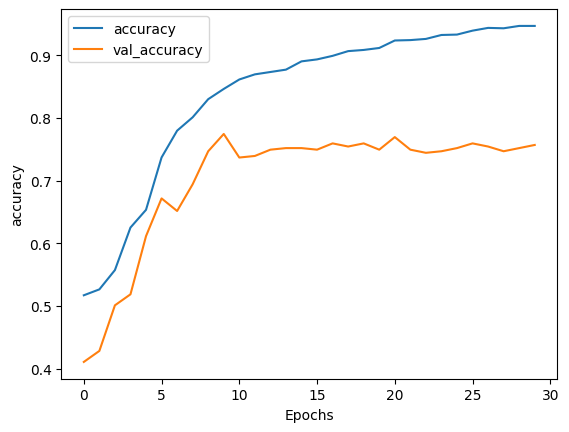

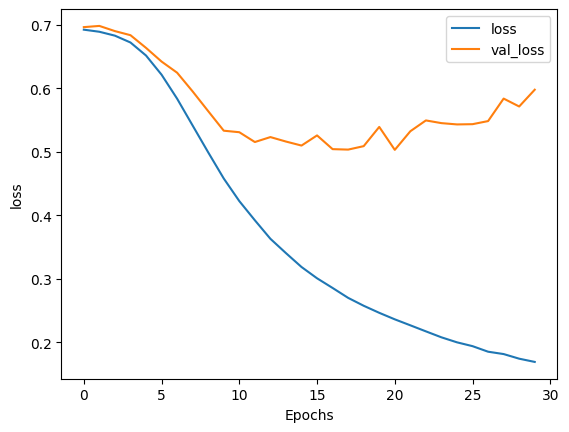

In [41]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [42]:
def predict_review(model, new_sentences, maxlen = max_length, show_padded_sequence = True):
    new_sequences = []

    for i, frvw in enumerate(new_sentences):
        new_sequences.append(tokenizer.encode(frvw))
    trunc_type = 'post'
    padding_type = 'post'

    new_reviews_padded = pad_sequences(new_sequences, maxlen = max_length,
                                       padding = padding_type, truncating = trunc_type)

    classes = model.predict(new_reviews_padded)

    for x in range(len(new_sequences)):
        if(show_padded_sequence):
            print(new_reviews_padded[x])
        print(new_sentences[x])
        print(classes[x])
        print("\n")

In [43]:
fake_reviews = ["I love this phone", 
                "Everything was cold",
                "Everything was hot exactly as I wanted", 
                "Everything was green", 
                "the host seated us immediately",
                "they gave us free chocolate cake", 
                "we couldn't hear each other talk because of the shouting in the kitchen"
              ]

predict_review(model, fake_reviews)

1/1 [==============================] - 0s 97ms/step
[  4 281  16  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
I love this phone
[0.9151372]


[812 227 864 100 775   9 525 843   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was cold
[0.09693054]


[812 227 864 100 775   9 109   8 333 731  24  61   4 171  59  77   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was hot exactly as I wanted
[0.2713022]


[812 227 864 100 775   9 157 359 853   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything w

In [48]:
def fit_model_now (model, sentences) :
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    
  model.summary()
    
  history = model.fit(train_sequences, train_labels_fin, epochs=num_epochs, 
                      validation_data=(test_sequences, test_labels_fin))
  return history

def plot_results (history):
  plot_graphs(history, "accuracy")
  plot_graphs(history, "loss")

def fit_model_and_show_results(model, sentences):
  history = fit_model_now(model, sentences)
  plot_results(history)
  predict_review(model, sentences)

Single bidirectional LSTM model

In [51]:
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 50, 16)            16000     
                                                                 
 bidirectional_3 (Bidirecti  (None, 32)                4224      
 onal)                                                           
                                                                 
 dense_8 (Dense)             (None, 6)                 198       
                                                                 
 dense_9 (Dense)             (None, 1)                 7         
                                                                 
Total params: 20429 (79.80 KB)
Trainable params: 20429 (79.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
50/50 [==============================] - 5s 33ms/step - loss: 0.6904 - ac

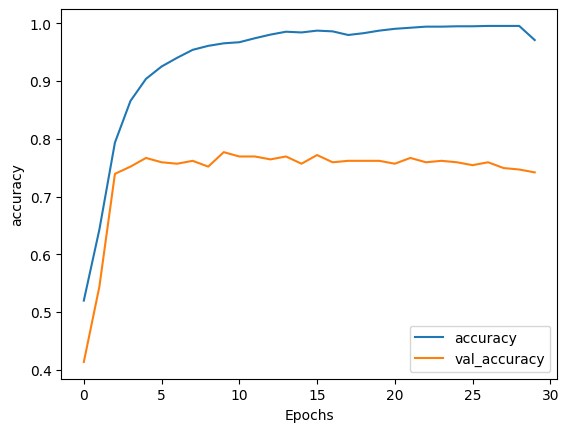

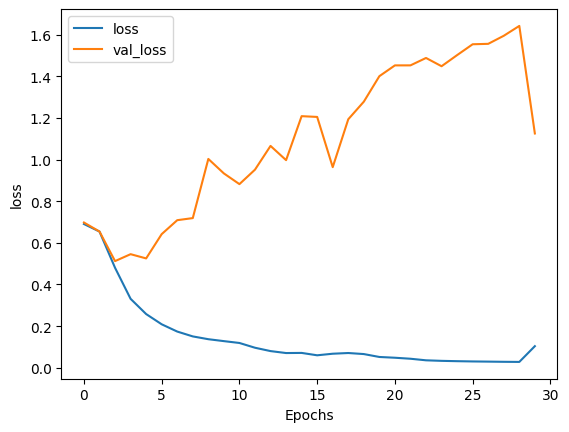

1/1 [==============================] - 1s 515ms/step
[  4 281  16  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
I love this phone
[0.99983895]


[812 227 864 100 775   9 525 843   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was cold
[0.02193109]


[812 227 864 100 775   9 109   8 333 731  24  61   4 171  59  77   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was hot exactly as I wanted
[0.03213835]


[812 227 864 100 775   9 157 359 853   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everythin

In [52]:
fit_model_and_show_results(model_lstm, fake_reviews)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 50, 16)            16000     
                                                                 
 bidirectional_4 (Bidirecti  (None, 50, 32)            4224      
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 32)                6272      
 onal)                                                           
                                                                 
 dense_10 (Dense)            (None, 6)                 198       
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 26701 (104.30 KB)
Trainable params: 2670

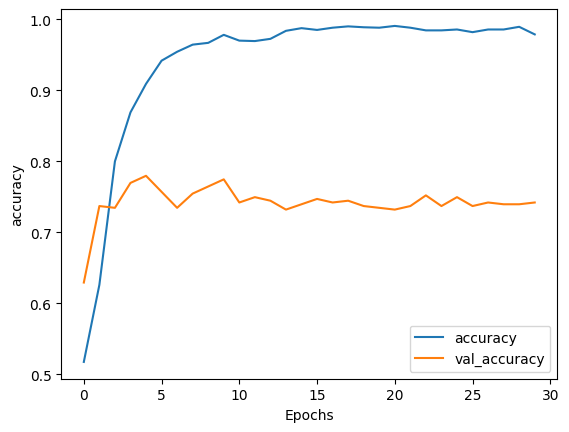

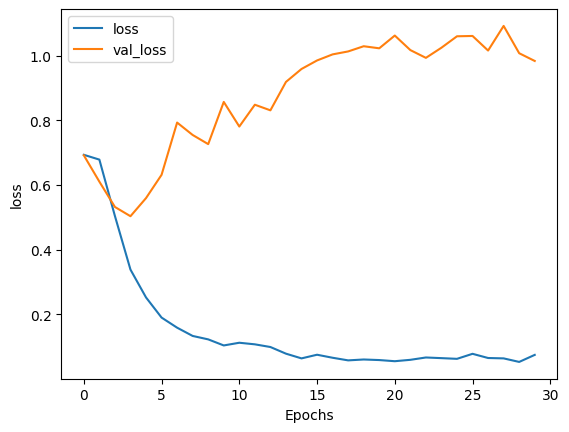

1/1 [==============================] - 1s 932ms/step
[  4 281  16  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
I love this phone
[0.9952278]


[812 227 864 100 775   9 525 843   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was cold
[0.00840251]


[812 227 864 100 775   9 109   8 333 731  24  61   4 171  59  77   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was hot exactly as I wanted
[0.385535]


[812 227 864 100 775   9 157 359 853   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything w

In [53]:
model_mul_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = (max_length)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

fit_model_and_show_results(model_mul_lstm, fake_reviews)

In [54]:
my_reviews = [
    "The pizza was amazing but the sushi was very dry.",
    "I loved the movie but the book was too loud.",
    "The flight was smooth but the desert was quite chilly.",
    "The concert was vibrant but the soup was rather silent.",
    "The coffee tasted great but the chairs were too spicy.",
    "The museum had great exhibits but the rain was too salty.",
    "The car ride was comfortable but the sunset was very bitter.",
    "The steak was cooked perfectly but the music was undercooked.",
    "The garden was beautiful but the air conditioning was too tangy.",
    "The waiter was friendly but the weather was too chewy."
]

In [55]:
print("===================================\n","Embeddings only:\n", "===================================",)
predict_review(model, my_reviews, show_padded_sequence=False)

 Embeddings only:
1/1 [==============================] - 0s 24ms/step
The pizza was amazing but the sushi was very dry.
[0.984256]


I loved the movie but the book was too loud.
[0.29018015]


The flight was smooth but the desert was quite chilly.
[0.4700207]


The concert was vibrant but the soup was rather silent.
[0.06660149]


The coffee tasted great but the chairs were too spicy.
[0.86528885]


The museum had great exhibits but the rain was too salty.
[0.98183805]


The car ride was comfortable but the sunset was very bitter.
[0.94684696]


The steak was cooked perfectly but the music was undercooked.
[0.99445385]


The garden was beautiful but the air conditioning was too tangy.
[0.44485897]


The waiter was friendly but the weather was too chewy.
[0.02870501]




In [56]:
print("===================================\n", "With a single bidirectional LSTM:\n", "===================================")
predict_review(model_lstm, my_reviews, show_padded_sequence=False)

 With a single bidirectional LSTM:
1/1 [==============================] - 0s 38ms/step
The pizza was amazing but the sushi was very dry.
[0.9999941]


I loved the movie but the book was too loud.
[0.9976107]


The flight was smooth but the desert was quite chilly.
[0.04187103]


The concert was vibrant but the soup was rather silent.
[0.01875083]


The coffee tasted great but the chairs were too spicy.
[0.99982727]


The museum had great exhibits but the rain was too salty.
[0.9999877]


The car ride was comfortable but the sunset was very bitter.
[0.9370747]


The steak was cooked perfectly but the music was undercooked.
[0.99381953]


The garden was beautiful but the air conditioning was too tangy.
[0.06545824]


The waiter was friendly but the weather was too chewy.
[0.01646268]




In [57]:
print("===================================\n","With two bidirectional LSTMs:\n", "===================================")
predict_review(model_mul_lstm, my_reviews, show_padded_sequence=False)

 With two bidirectional LSTMs:
1/1 [==============================] - 0s 43ms/step
The pizza was amazing but the sushi was very dry.
[0.9945951]


I loved the movie but the book was too loud.
[0.97771484]


The flight was smooth but the desert was quite chilly.
[0.02344376]


The concert was vibrant but the soup was rather silent.
[0.0103217]


The coffee tasted great but the chairs were too spicy.
[0.99320257]


The museum had great exhibits but the rain was too salty.
[0.9947813]


The car ride was comfortable but the sunset was very bitter.
[0.7744099]


The steak was cooked perfectly but the music was undercooked.
[0.9956608]


The garden was beautiful but the air conditioning was too tangy.
[0.9202797]


The waiter was friendly but the weather was too chewy.
[0.01430818]


